In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

reviews = pd.read_csv('movie.csv')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/coforgeyjahn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/coforgeyjahn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/coforgeyjahn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
print(reviews)

                                                    text  label
0      I grew up (b. 1965) watching and loving the Th...      0
1      When I put this movie in my DVD player, and sa...      0
2      Why do people who do not know what a particula...      0
3      Even though I have great interest in Biblical ...      0
4      Im a die hard Dads Army fan and nothing will e...      1
...                                                  ...    ...
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39997  My wife and I watched this movie because we pl...      0
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1

[40000 rows x 2 columns]


# Text Normalization

In [3]:
# Lowercase
reviews['text'] = reviews['text'].str.lower()

# Remove URLs
reviews['text'] = reviews['text'].str.replace(r'http\S+|www\S+|https\S+','')

# Remove numbers
reviews['text'] = reviews['text'].str.replace(r'\d', '')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def lemmatize_stem_and_remove_stopwords(review):
    review_tokens = word_tokenize(review)
    
    # Remove stopwords and apply stemming and lemmatization
    cleaned_tokens = []
    for token in review_tokens:
        if token not in stop_words:
            stemmed = stemmer.stem(token)
            lemmatized = lemmatizer.lemmatize(stemmed)
            cleaned_tokens.append(lemmatized)
    
    return ' '.join(cleaned_tokens)


reviews['text'] = reviews['text'].apply(lemmatize_stem_and_remove_stopwords)
print(reviews.head())

                                                text  label
0  grew ( b . 1965 ) watch love thunderbird . mat...      0
1  put movi dvd player , sat coke chip , expect ....      0
2  peopl know particular time past like feel need...      0
3  even though great interest biblic movi , bore ...      0
4  im die hard dad armi fan noth ever chang . got...      1


2. Utilise a pre-trained NER model or train your own using an appropriate
dataset. Extract named entities from the text. Print or display the
identified named entities along with their types (e.g., PERSON,
LOCATION, ORGANIZATION).

In [4]:
import spacy
named_entities_model = spacy.load('en_core_web_sm')

# Applying NER to each review text and storing results in a new column 'named_entities'
spacy_ner = []
for index, row in reviews.iterrows():
    review = named_entities_model(row['text'])
    entities = [(ent.text, ent.label_) for ent in review.ents]
    spacy_ner.append(entities)

reviews['named_entities'] = spacy_ner

In [5]:
# Display the DataFrame with the named entities column and all of the types of entities in the dataset
print(reviews['named_entities'])

ner_types = set()
for entities in spacy_ner:
    for entity in entities:
        ner_types.add(entity[1])

print("Types of named entities: ", ner_types)

0        [(1965, DATE), (virgil scott, PERSON), (one, C...
1        [(first, ORDINAL), (funni comedi, ORG), (first...
2        [(one, CARDINAL), (dian, NORP), (abus, ORG), (...
3        [(everyth bad, PERSON), (movi long, PERSON), (...
4        [(armi, ORG), (chang, PERSON), (everi time, PE...
                               ...                        
39995    [(howev, PERSON), (2 england, LOC), (one, CARD...
39996    [(explor everi nook, PERSON), (one, CARDINAL),...
39997    [(unfortun, PERSON), (rang stiff complet, PERS...
39998    [(first, ORDINAL), (flatlin, PERSON), (necessa...
39999    [(95,000,000, MONEY), (john travolta know 's, ...
Name: named_entities, Length: 40000, dtype: object
Types of named entities:  {'LOC', 'FAC', 'ORG', 'MONEY', 'TIME', 'PERCENT', 'LANGUAGE', 'CARDINAL', 'QUANTITY', 'ORDINAL', 'PERSON', 'EVENT', 'DATE', 'LAW', 'NORP', 'GPE', 'WORK_OF_ART', 'PRODUCT'}


3. Build a naïve bayes classifier and use BOW and feature selection
methods such as selection of the 3000 most important words. You
should evaluate your model on 10 percent of the data, please report
the precision, recall, accuracy, and F-score of each class.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split as split
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(reviews['text'])
y = reviews['label']


X_train, X_test, y_train, y_test = split(X, y, test_size=0.1, random_state=42)

# Step 4: Train Naïve Bayes classifier
multinomial_nb = MultinomialNB().fit(X_train, y_train)
multinomial_nb_predictions = multinomial_nb.predict(X_test)

# Calculate accuracy, precision, recall, and f1 of Multinomial Naive Bayes model
model_multinomial_nb_accuracy = accuracy_score(y_test, multinomial_nb_predictions)
model_multinomial_nb_precision = precision_score(y_test, multinomial_nb_predictions)
model_multinomial_nb_recall = recall_score(y_test, multinomial_nb_predictions)
model_multinomial_nb_f1 = f1_score(y_test, multinomial_nb_predictions)

print("Multinomial Naive Bayes Test Accuracy: ", model_multinomial_nb_accuracy)
print("Multinomial Naive Bayes Test Precision: ", model_multinomial_nb_precision)
print("Multinomial Naive Bayes Test Recall: ", model_multinomial_nb_recall)
print("Multinomial Naive Bayes Test F1: ", model_multinomial_nb_f1)


Multinomial Naive Bayes Test Accuracy:  0.84075
Multinomial Naive Bayes Test Precision:  0.8466566113624937
Multinomial Naive Bayes Test Recall:  0.8353174603174603
Multinomial Naive Bayes Test F1:  0.840948813982522


4. Preprocess the dataset, tokenize the text, and convert it into a
sequence of word embeddings (such as Word2Vec or GloVe). Design a
BiLSTM classification model and train the model using the labelled
dataset. Evaluate the model's performance on 10 percent of data using
appropriate evaluation metrics and discuss any techniques used to
handle overfitting.

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Test acc')
    plt.title('Training and test accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='test loss')
    plt.title('Training and test loss')
    plt.legend()

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

max_len = 100
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews['text'])
sequences = tokenizer.texts_to_sequences(reviews['text'])
X = pad_sequences(sequences, maxlen=max_len)
y = np.array(reviews['label'])

X_train, X_test, y_train, y_test = split(X, y, test_size=0.1, random_state=42)

embeddings_index = {}
with open('glove.6B/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create an embedding matrix
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim,
                           weights=[embedding_matrix],
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=32)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 38s 33ms/step - accuracy: 0.5116 - loss: 0.7115 - val_accuracy: 0.6033 - val_loss: 0.6707
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 36s 32ms/step - accuracy: 0.5904 - loss: 0.6688 - val_accuracy: 0.7592 - val_loss: 0.5670
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 36s 32ms/step - accuracy: 0.6875 - loss: 0.5832 - val_accuracy: 0.8075 - val_loss: 0.4771
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 36s 32ms/step - accuracy: 0.7335 - loss: 0.5252 - val_accuracy: 0.8158 - val_loss: 0.4473
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 37s 33ms/step - accuracy: 0.7552 - loss: 0.4964 - val_accuracy: 0.8282 - val_loss: 0.4231
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 37s 32ms/step - accuracy: 0.7762 - loss: 0.4752 - val_accuracy: 0.8288 - val_loss: 0.4076
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 35s 31ms/step - accuracy: 0.7836 - loss: 0.4567 - val_accuracy: 0.8317 - val_loss: 0.4016
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 35s 31ms/step - accuracy: 0.7972 -

Training Accuracy: 0.8878
Testing Accuracy:  0.8390


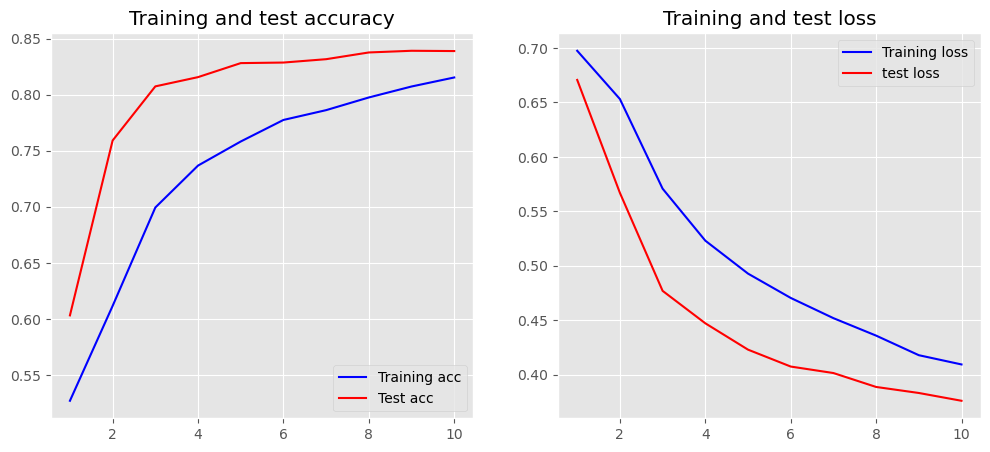

In [22]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history)

In [23]:
# Calculate metrics
glove_predictions = model.predict(X_test)

# Convert probabilities to binary to get metrics
glove_predictions = (predictions > 0.5).astype(int)

glove_accuracy = accuracy_score(y_test, glove_predictions)
glove_precision = precision_score(y_test, glove_predictions)
glove_recall = recall_score(y_test, glove_predictions)
glove_f1 = f1_score(y_test, glove_predictions)

print("Glove Embedding Test Accuracy: ", glove_accuracy)
print("Glove Embedding Test Precision: ", glove_precision)
print("Glove Embedding Test Recall: ", glove_recall)
print("Glove Embedding Test F1: ", glove_f1)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
Glove Embedding Test Accuracy:  0.839
Glove Embedding Test Precision:  0.8346341463414634
Glove Embedding Test Recall:  0.8487103174603174
Glove Embedding Test F1:  0.8416133792424988


5. Compare the results and performance of the two designed classifiers.

Based on the results in part 3 and part 4, we can see that multinomial naive bayes performs reasonably well using Bag Of Words, and with a maximum features of 5000. This model accurately predicted the movie review sentiment 84. 075% of the time, with 84.67% of the true positive reviews being predicted positive. Multinomial Naive Bayes with Bag of Words also correctly predicted 83.53% of the true positives as positives. The runtime of multinomial naive bayes on a dataset with more than 40,000 reviews was also quite efficient, taking only a few minutes.

When executing the model in part 4, which uses the Glove embedding technique, I opted to use a max length of 100, and only 10 epochs while fitting the model. After initially executing this I got an accuracy of 97% on the training set and 80% on the test set. This could potentially indicate overfitting so I added a dropout of 0.5 to prevent this. I also opted to use an embedding matrix with dimension 100, meaning each of the 77931 is represented by a vector of 100 word embeddings, and our complete embedding matrix has size 77931 x 100. This model, using a binary crossentropy loss received an accuracy of 88.78% on the training set and 83.90% on the test set, suggesting that the overfitting has been reduced. This model received precision of 83.46%, slightly worse than the multinomial naive bayes, although it received a recall of 84.87% which is slightly better than multinomial naive bayes.

Overall, both models performed similarly with a prediction accuracy of ~84%, suggesting that both models are good choices to use in sentiment analysis of movie reviews.